<a href="https://colab.research.google.com/github/rohitsubodh/Rohit/blob/main/Climate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('filename.csv')
df=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday','district','month_index']]

In [ ]:
df

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
0,12.571663,4.861222,77.267091,1.525148,14.375759,0.9,Bhagalpur,1
1,16.876908,4.658724,76.001416,1.749436,13.976031,0.9,Bhagalpur,1
2,15.775776,3.505728,79.321824,1.713624,12.331613,0.9,Bhagalpur,1
3,12.903226,3.196545,79.323649,1.591761,12.337610,0.9,Bhagalpur,1
4,16.829754,4.926399,78.572965,1.469696,12.780349,0.9,Bhagalpur,1
...,...,...,...,...,...,...,...,...
5105,22.921990,1.056778,86.740943,0.523402,2.164579,0.4,Supaul,12
5106,22.700828,1.516224,83.216797,0.600504,5.536653,0.4,Supaul,12
5107,17.960705,2.402960,84.923203,0.599858,4.497545,0.4,Supaul,12
5108,25.074912,0.815435,85.353020,0.590177,3.974889,0.4,Supaul,12


In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
df['district']=lb.fit_transform(df['district'])

In [ ]:
df['district'].unique()

array([ 0, 11,  1,  2,  3,  4, 12,  5,  6, 13,  7,  8,  9, 10])

In [ ]:
df

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
0,12.571663,4.861222,77.267091,1.525148,14.375759,0.9,0,1
1,16.876908,4.658724,76.001416,1.749436,13.976031,0.9,0,1
2,15.775776,3.505728,79.321824,1.713624,12.331613,0.9,0,1
3,12.903226,3.196545,79.323649,1.591761,12.337610,0.9,0,1
4,16.829754,4.926399,78.572965,1.469696,12.780349,0.9,0,1
...,...,...,...,...,...,...,...,...
5105,22.921990,1.056778,86.740943,0.523402,2.164579,0.4,10,12
5106,22.700828,1.516224,83.216797,0.600504,5.536653,0.4,10,12
5107,17.960705,2.402960,84.923203,0.599858,4.497545,0.4,10,12
5108,25.074912,0.815435,85.353020,0.590177,3.974889,0.4,10,12


In [ ]:
df = df.sample(frac = 1) 
df

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday,district,month_index
4286,21.884662,2.884715,71.501169,0.784565,9.506467,0.3,11,11
1774,24.202536,5.638834,44.073098,1.048054,14.949944,1.7,2,5
1480,27.096406,4.809284,57.527929,1.073929,13.178931,1.0,5,4
987,20.073342,6.924724,46.126819,1.607873,11.888671,0.7,4,3
4826,19.262744,3.674833,82.266590,1.157225,9.192665,0.6,3,12
...,...,...,...,...,...,...,...,...
2425,27.766341,6.012744,81.430587,5.136162,278.748499,10.0,7,6
3789,29.395161,6.233334,83.408014,5.797507,233.983198,9.6,9,9
4553,24.796616,1.420562,71.466148,1.214592,6.069758,0.3,13,11
1915,33.118311,6.106134,68.527099,1.696145,51.109247,3.0,5,5


In [ ]:
X=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday']]
y1=df[['district']]
y2=df[['month_index']]

In [ ]:
X1=X.iloc[:,:-1].values 
X1.shape
X.shape
y1.shape

(5110, 1)

In [ ]:

y12=df['district'].values
y12.size

5110

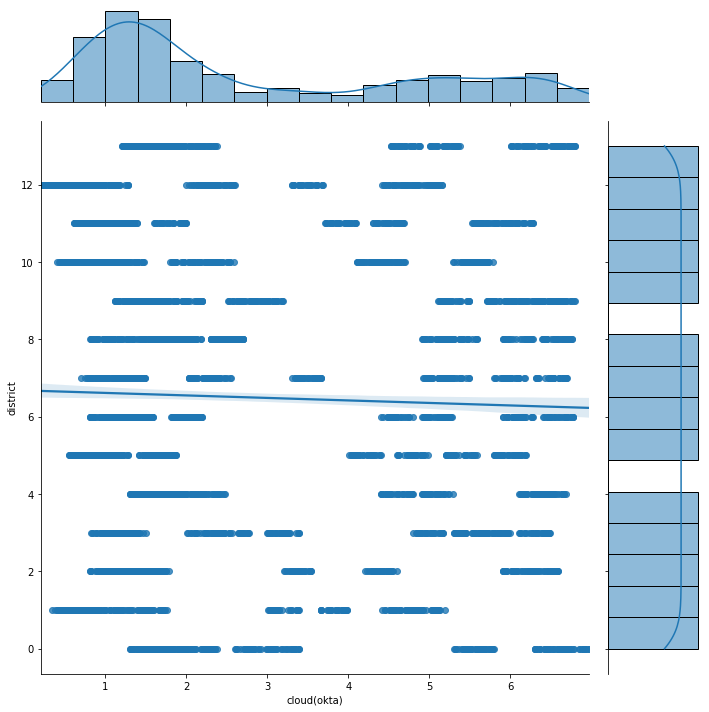

In [ ]:
# X=df[['temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday']]

sns.jointplot(x='cloud(okta)',y='district',data=df,kind='reg',height=10)
plt.show();

In [ ]:
corr_matrix=X.corr()
pd.options.display.float_format='{:,.2f}'.format
corr_matrix

,temp(cel),mean_windspeed(km/hr),re_hum(%),cloud(okta),rain(mm),avg._no._rainyday
temp(cel),1.00,0.52,-0.02,0.48,0.45,0.47
mean_windspeed(km/hr),0.52,1.00,-0.07,0.47,0.39,0.41
re_hum(%),-0.02,-0.07,1.00,0.50,0.50,0.49
cloud(okta),0.48,0.47,0.50,1.00,0.94,0.96
rain(mm),0.45,0.39,0.50,0.94,1.00,0.99
avg._no._rainyday,0.47,0.41,0.49,0.96,0.99,1.00


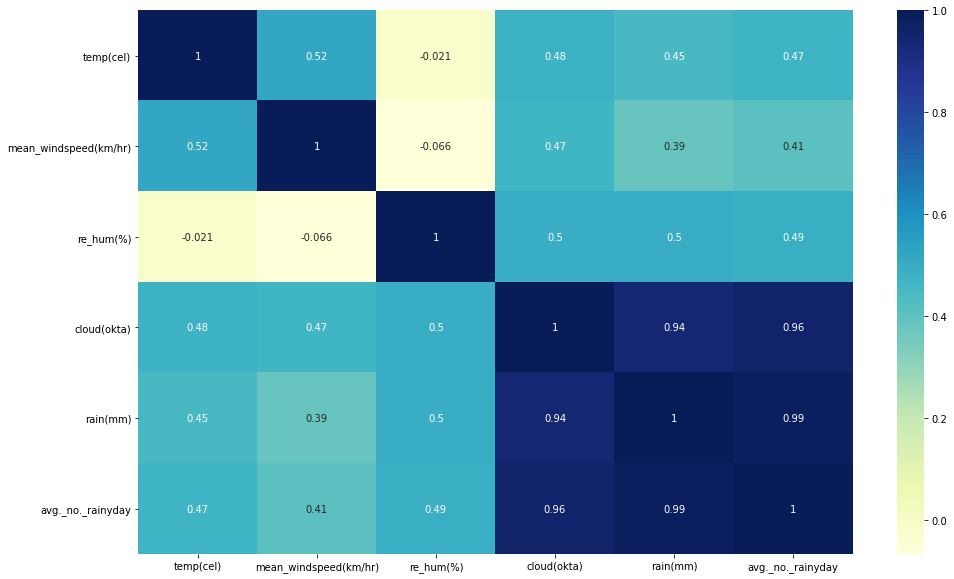

In [ ]:
plt.figure(figsize=(16,10 ))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

In [ ]:
eignvalues,eignvectors = np.linalg.eig(X.corr())

In [ ]:
pd.Series(eignvalues).sort_values()

4   0.01
5   0.06
3   0.41
2   0.48
1   1.32
0   3.72
dtype: float64

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# clf = clf.fit(X,y1)

In [ ]:
# Xv = X.values.reshape(-1,1)
# # y1=y1.values.reshape(-1,1)

# h=.02
# x_min,x_max = Xv.min(),Xv.max() + 1
# y_min,y_max = y1.min(),y1.max() + 1
# Xv

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y1,test_size=.1,random_state=42)
clf = clf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9334637964774951

In [ ]:
# 'temp(cel)','mean_windspeed(km/hr)','re_hum(%)','cloud(okta)','rain(mm)','avg._no._rainyday']]
# y1=df[['district']]
Xm=[[22,0,92.5,0,150,0]]
t=clf.predict(Xm)

In [ ]:
t

array([10])